In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('alltests_with_normalized_results.csv')

In [3]:
norm_grouped = df.groupby(['benchmark', 'machine', 'limits'])['normalized'].mean().to_frame()

In [4]:
HTML(norm_grouped.to_html())

In [5]:
withcpu_only = norm_grouped.copy()
withcpu_only.reset_index(inplace=True)
withcpu_only = withcpu_only[withcpu_only['limits'] != 'without']
len(withcpu_only.index)

44

In [6]:
# show number of tests with normalized result (speedup/slowdown) within 10% of the base result
len(withcpu_only[(withcpu_only.normalized >= 0.90) & (withcpu_only.normalized <= 1.10)])

1

In [8]:
# show number of tests with normalized result outside this 10%
len(withcpu_only[((withcpu_only['normalized'] < 0.90) | (withcpu_only['normalized'] > 1.10))])

22

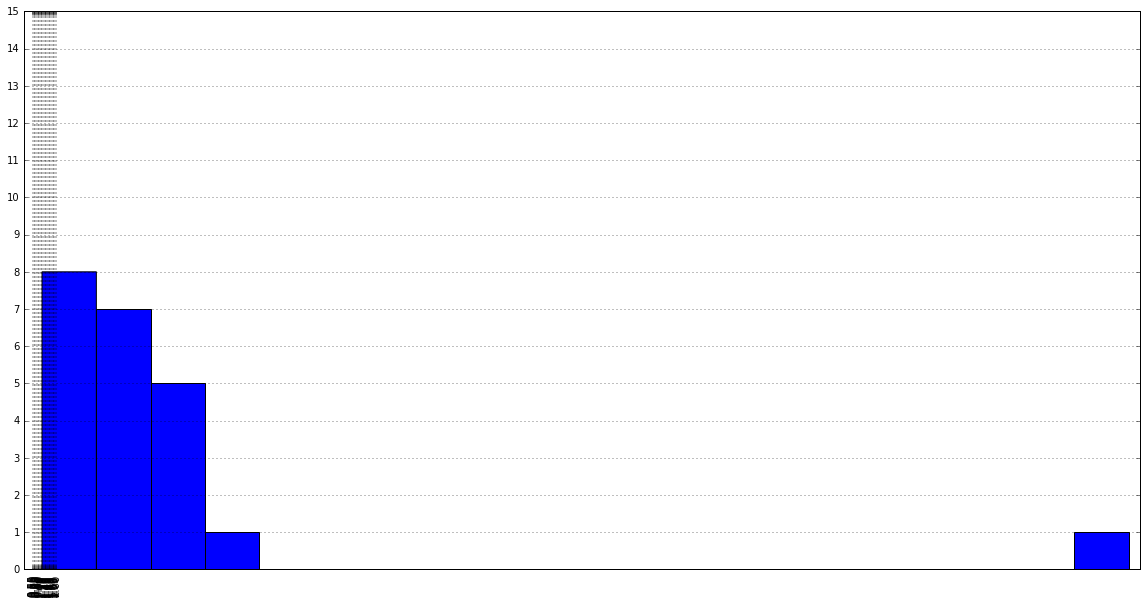

In [7]:
plt.figure(figsize=(20,10))
bins=[.5, .55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2]
ax = withcpu_only[withcpu_only['machine'] == 'issdm-3'].normalized.hist(bins=20,xrot=90)
ticks = ax.set_xticks(bins)
ticks = ax.set_yticks(range(0,16))

In [8]:
withcpumem_only = norm_grouped.copy()
withcpumem_only.reset_index(inplace=True)
withcpumem_only = withcpumem_only[withcpumem_only['limits'] == 'withmemcpu']
len(withcpumem_only.index)

0

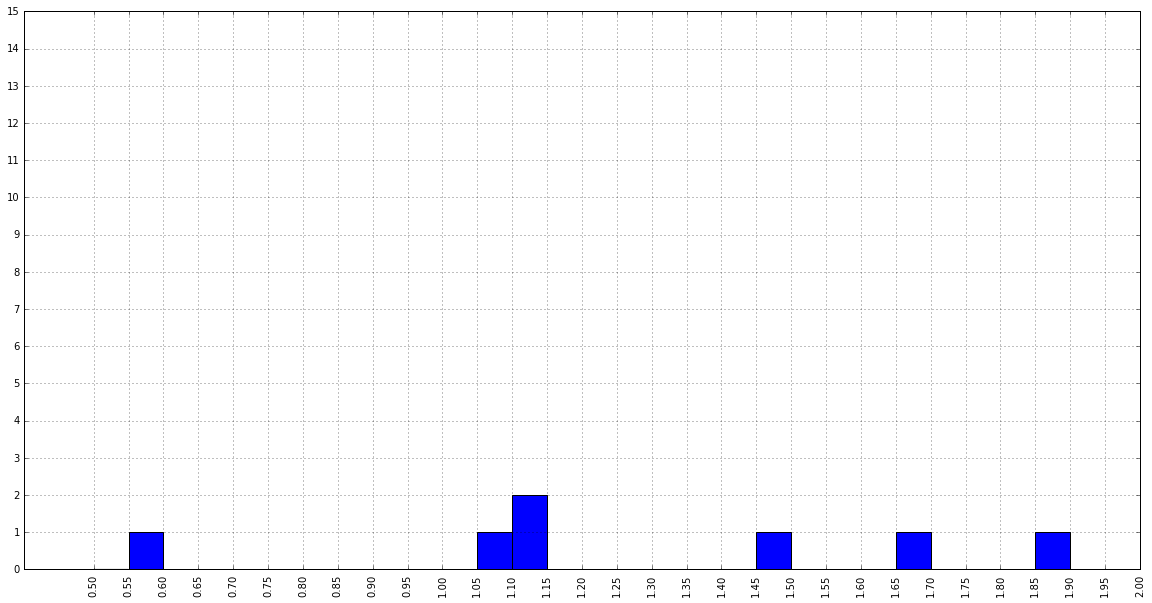

In [9]:
plt.figure(figsize=(20,10))
bins=[.5, .55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2]
ax = withcpu_only.normalized.hist(bins=bins,xrot=90)
ticks = ax.set_xticks(bins)
ticks = ax.set_yticks(range(0,16))

In [10]:
df = pd.read_csv('alltests_with_normalized_results.csv')

In [11]:
df.benchmark.unique()

array(['stressng-cpu-bsearch', 'stressng-cpu-context', 'stressng-cpu-cpu',
       'stressng-cpu-crypt', 'stressng-cpu-full', 'stressng-cpu-hsearch',
       'stressng-cpu-longjmp', 'stressng-cpu-lsearch',
       'stressng-cpu-malloc', 'stressng-cpu-matrix', 'stressng-cpu-memcpy',
       'stressng-cpu-mincore', 'stressng-cpu-null', 'stressng-cpu-pipe',
       'stressng-cpu-remap', 'stressng-cpu-str', 'stressng-cpu-stream',
       'stressng-cpu-tlb-shootdown', 'stressng-cpu-tsearch',
       'stressng-cpu-vecmath', 'stressng-cpu-wcs', 'stressng-cpu-zero'], dtype=object)

In [12]:
len(df.benchmark.unique())

22

In [13]:
norm_grouped = df.copy().groupby(['benchmark','machine', 'limits', 'class'])['normalized'].mean().to_frame()

In [14]:
norm_grouped.reset_index(inplace=True)


In [15]:
norm_grouped.copy().groupby(['machine', 'limits', 'class'])['normalized'].mean().to_frame()

normalized
machine   limits     class              
issdm-3   quota-1000 cpu        7.474131
                     memory    10.816794
          without    cpu     1025.795522
                     memory  1199.015711
rackform1 quota-1001 cpu        6.412017
                     memory     7.326635
          without    cpu     1981.117574
                     memory  1898.913331

In [16]:
norm_grouped.copy().groupby(['machine', 'limits', 'class'])['normalized'].median().to_frame()

normalized
machine   limits     class              
issdm-3   quota-1000 cpu        7.918752
                     memory     5.504377
          without    cpu      954.476359
                     memory   665.356224
rackform1 quota-1001 cpu        5.818498
                     memory     2.400783
          without    cpu     1517.313883
                     memory   665.742965

In [17]:
norm_grouped[(norm_grouped.normalized > .83) & (norm_grouped.normalized < .93)].copy().groupby(['machine', 'limits', 'class'])['normalized'].count().to_frame()

,,,normalized
machine,limits,class,


In [20]:
pd.unique(norm_grouped['class'])

array(['cpu'], dtype=object)

In [19]:
df[(df['machine'] == 'nibbler.soe.ucsc.edu') & (df['benchmark'] == 'stressng-cpu-bitops')]

,benchmark,base_result,machine,limits,class,lower_is_better,repetition,result,normalized


In [20]:
pd.unique(norm_grouped.machine)

array(['issdm-3', 'rackform1'], dtype=object)

In [21]:
norm_grouped[(norm_grouped['machine'] == '192.168.140.82') & (norm_grouped.limits =='without') & (norm_grouped.normalized > 18)]

,benchmark,machine,limits,class,normalized


In [22]:
maxes = norm_grouped.groupby(['machine', 'limits']).max()
maxes.reset_index(inplace=True)
maxes.rename(columns={'normalized': 'normalized_max'}, inplace=True)

mines = norm_grouped.groupby(['machine', 'limits']).min()
mines.reset_index(inplace=True)
mines.rename(columns={'normalized': 'normalized_min'}, inplace=True)

mines.drop('benchmark', axis=1, inplace=True)
maxes.drop('benchmark', axis=1, inplace=True)

maxs_and_mins = pd.merge(maxes, mines, on=['machine','limits','class'])
maxs_and_mins['range'] = maxs_and_mins['normalized_max'] - maxs_and_mins['normalized_min']
maxs_and_mins

,machine,limits,class,normalized_max,normalized_min,range


In [25]:
norm_grouped.groupby(['machine', 'limits']).min()

benchmark class  normalized
machine   limits                                            
issdm-3   quota-1000  stressng-cpu-bsearch   cpu    2.423723
          without     stressng-cpu-bsearch   cpu  132.308324
rackform1 quota-1001  stressng-cpu-bsearch   cpu    0.568964
          without     stressng-cpu-bsearch   cpu  175.369355

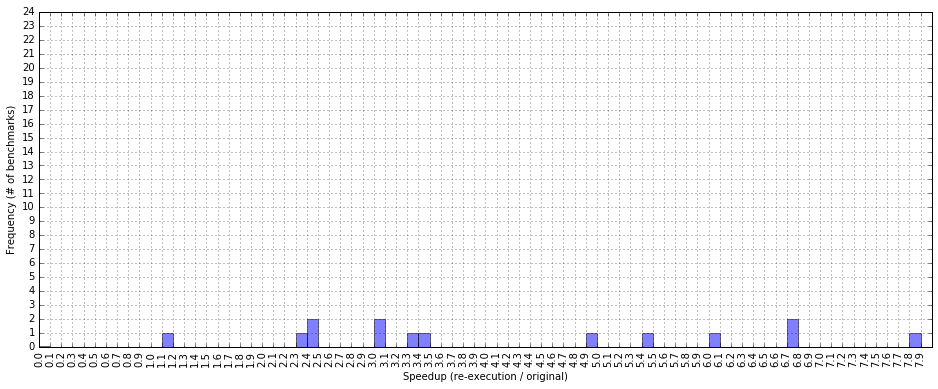

In [23]:
#plt.figure(figsize=(20,10))
bins=[.5, .55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2,3.25,3.5,3.75,4,4.25,4.5,4.75,5,6,7,8,9]
pred=(
      (norm_grouped['machine'] == 'issdm-3'))

ax = norm_grouped[pred].groupby('limits').normalized.hist(bins=np.arange(0,8,.1),xrot=90,figsize=(16,6),alpha=0.5)
ticks = ax[0].set_xticks(np.arange(0,8,.1))
ticks = ax[0].set_yticks(range(0,25))
plt.xlabel('Speedup (re-execution / original)')
plt.ylabel('Frequency (# of benchmarks)')
plt.savefig('with_and_without_limits.png', bbox_inches='tight', dpi=300)

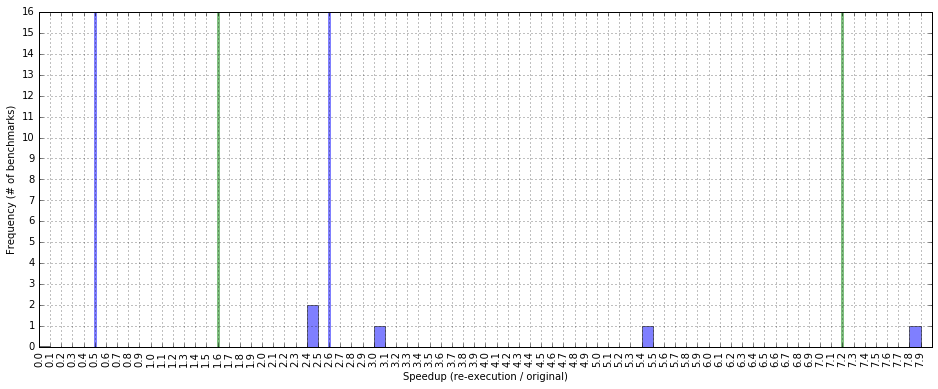

In [27]:
#plt.figure(figsize=(20,10))
bins=[.5, .55,.6,.65,.7,.75,.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2,3.25,3.5,3.75,4,4.25,4.5,4.75,5,6,7,8,9]
pred=(
      (norm_grouped['machine'] == 'issdm-3'))

ax = norm_grouped[pred].groupby('limits').normalized.hist(bins=np.arange(0,8,.1),xrot=90,figsize=(16,6),alpha=0.5)
plt.axvline(x=2.6,color='b',linewidth=3, alpha=0.5)
plt.axvline(x=.5,color='b',linewidth=3, alpha=0.5)
plt.axvline(x=7.2,color='g',linewidth=3, alpha=0.5)
plt.axvline(x=1.6,color='g',linewidth=3, alpha=0.5)
ticks = ax[0].set_xticks(np.arange(0,8,.1))
ticks = ax[0].set_yticks(range(0,17))
plt.xlabel('Speedup (re-execution / original)')
plt.ylabel('Frequency (# of benchmarks)')
plt.savefig('benchmarks.png', bbox_inches='tight', dpi=300)

In [ ]:
norm_grouped[(norm_grouped['machine'] == '192.168.140.86') & (norm_grouped.limits == 'without') & (norm_grouped.normalized < 1.6)]